# [ GLOBAL SECTION ]

In [1]:
import random, datetime, copy
import numpy as np
import matplotlib.pyplot as plt

import pygw
import pygw.common # get_random_range, int2base, base2int, strA
from pygw.common import MDLOG
from pygw.model import WORLD, ENV
import pygw.worlds as worlds
import pygw.nets as nets
from pygw.agents.dqn import AGENT as DQN
from pygw.agents.tql import AGENT as TQL
from pygw.agents.basic import AGENT as BASIC

# [ Create / Load a WORLD ]

In [2]:
world = worlds.TEMPLATE()
print(world.name)

Template World


# [ Create ENV ]

###  ENV variables
```
        self.FIGSR = 0.8
        self.cmap = 'PiYG'
        self.spcol = 'green'#  color (start position)
        self.epcol = 'red'  #  color (end position)
        self.ccol = 'black' #  col (current position)
        self.acol = 'tab:grey' # arrow color
        self.max_ts = (self.R*self.C)*10
        self.max_ts_test = (self.R*self.C)*2
 ```

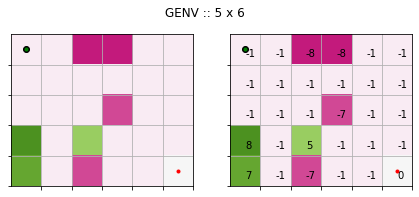

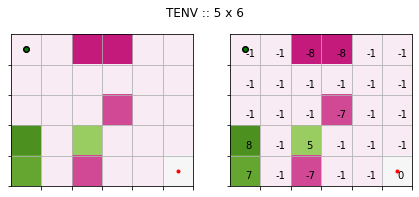

In [3]:
env = ENV(world, name="GENV")
Tenv = ENV(world, name="TENV")
np.copyto(Tenv.Si, env.Si)
Tenv.reset()

env.FIGSR = 0.6
Tenv.FIGSR = 0.6
#env.cmap = 'summer'
#env.spcol = 'tab:purple'

env.render( mode=1, caption=env.name+" :: " + str(env.R)+" x "+str(env.C))
Tenv.render( mode=1, caption=Tenv.name+" :: " + str(env.R)+" x "+str(env.C))

# [ Test Simulate with BASIC agent ]

Test Policy: [1, 1, 3, 3, 2, 2, 0, 0]
Testing agent { agent_pie } on env [ GENV ]
1  --> Action: 1 Current Reward: -1 Cummulative Reward: -1  Final State? [ False ]
2  --> Action: 1 Current Reward: -8 Cummulative Reward: -9  Final State? [ False ]
3  --> Action: 3 Current Reward: -1 Cummulative Reward: -10  Final State? [ False ]
4  --> Action: 3 Current Reward: -1 Cummulative Reward: -11  Final State? [ False ]
5  --> Action: 2 Current Reward: -1 Cummulative Reward: -12  Final State? [ False ]
6  --> Action: 2 Current Reward: -1 Cummulative Reward: -13  Final State? [ False ]
7  --> Action: 0 Current Reward: -1 Cummulative Reward: -14  Final State? [ False ]
8  --> Action: 0 Current Reward: -1 Cummulative Reward: -15  Final State? [ False ]
9  --> Action: -1 Current Reward: 0 Cummulative Reward: -15  Final State? [ True ]


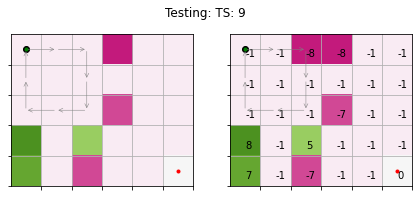

Action Sequence: [1, 1, 3, 3, 2, 2, 0, 0, -1]
Total Reward: -15
Action Sequence: [1, 1, 3, 3, 2, 2, 0, 0, -1]
Reward Sequence: [-1, -8, -1, -1, -1, -1, -1, -1, 0]
Total Reward: -15


In [4]:
basic_agt = BASIC(env=env)
#test_pie = np.random.randint(0,env.A, size=env.R+env.C)
test_pie = [1,1,3,3,2,2,0,0] #<---- agents does a loop back to start position
basic_agt.set_pie(test_pie)
print('Test Policy:', test_pie)

pie, rew, trew, _ = env.test(basic_agt,
             #reset_env=True, 
             #return_info=False, 
             verbose=3, 
             mode=1,last_render_only=True,
             rprint=print)
print('Action Sequence:', pie)
print('Reward Sequence:', rew)
print('Total Reward:', trew)

# [ Find Optimal Policy using Traditional Q-Learning  ]

States discovered: 2387
Testing agent { agent_tql } on env [ GENV ]
1  --> Action: 3 Current Reward: -1 Cummulative Reward: -1  Final State? [ False ]
2  --> Action: 3 Current Reward: -1 Cummulative Reward: -2  Final State? [ False ]
3  --> Action: 3 Current Reward: 8 Cummulative Reward: 6  Final State? [ False ]
4  --> Action: 3 Current Reward: 7 Cummulative Reward: 13  Final State? [ False ]
5  --> Action: 0 Current Reward: -1 Cummulative Reward: 12  Final State? [ False ]
6  --> Action: 1 Current Reward: -1 Cummulative Reward: 11  Final State? [ False ]
7  --> Action: 1 Current Reward: 5 Cummulative Reward: 16  Final State? [ False ]
8  --> Action: 1 Current Reward: -1 Cummulative Reward: 15  Final State? [ False ]
9  --> Action: 3 Current Reward: -1 Cummulative Reward: 14  Final State? [ False ]
10  --> Action: 1 Current Reward: -1 Cummulative Reward: 13  Final State? [ False ]
11  --> Action: 1 Current Reward: 0 Cummulative Reward: 13  Final State? [ True ]


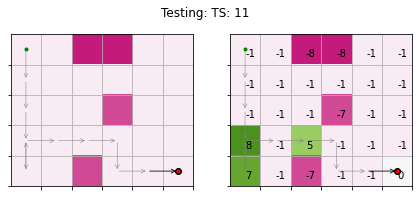

Action Sequence: [3, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1]
Total Reward: 13
Action Sequence: [3, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1]
Reward Sequence: [-1, -1, 8, 7, -1, -1, 5, -1, -1, -1, 0]
Total Reward: 13
Elapsed time = 0:01:07.660551


In [5]:
#*********************************************************
timestamp_start = datetime.datetime.now()
#*********************************************************

tql_agt = TQL(env=env)
tql_agt.train(M=500_000, lr=0.5, dis=0.99, epsilon=0.3, clear_Q=True, reset_env=True)
print('States discovered:', len(tql_agt.Q))
pie, rew, trew, _ = env.test(tql_agt,
             reset_env=True, 
             return_info=False, 
             verbose=3, mode=1, last_render_only=True, rprint=print)
print('Action Sequence:', pie)
print('Reward Sequence:', rew)
print('Total Reward:', trew)

# strore results to compare later
TQL_RES = [pie, trew]
#*********************************************************
timestamp_dur = datetime.datetime.now() - timestamp_start
print('Elapsed time = ' + str(timestamp_dur))
#*********************************************************

# [ Find Optimal Policy using Deep Q-Learning  ]

In [ ]:
#*********************************************************
timestamp_start = datetime.datetime.now()
#*********************************************************

dqn_agt = DQN(env_train=env, env_test=Tenv, 
              qnet=nets.DQN_D0(env.LEN, env.A, lr=0.01, layer_size=[500,200,50]))

_ , _, total_updates, tested_pies, tested_rews, tested_base_eps = \
dqn_agt.train(max_replay_memory = 512*6, 
              max_episodes = 1500, 
              dis = 0.99, 
              epsilonA = [0.05, 0.0001, 0.05, 0.85, 0],
              mini_batch_size = 512 * 3,
              train_freq = (env.R+env.C)*10,
              update_freq = 30, 
              random_init_state=False,
              clear_mem=True, 
              test_on_update=True,
              verbose=1,  test_verbose=1, last_render_only=True, mode=1, rprint=print)

print('Done! Total updates mades to TNET:',total_updates)


#*********************************************************
timestamp_dur = datetime.datetime.now() - timestamp_start
print('Elapsed time = ' + str(timestamp_dur))
#*********************************************************

## [ Plot the DQN training results ]

In [ ]:

fix,ax = plt.subplots(2,1, sharex=True, figsize=(16,7))

scatX = np.arange(0,total_updates+1,1 )

#ax[1].set_title('Epsilon Overtime')
ax[1].plot(tested_base_eps, color='tab:purple', linewidth=0.8)
ax[1].set_ylim(0,1)
ax[1].set_xlim(0,total_updates+1)
ax[1].set_ylabel('Epsilon')

#ax[0].set_title('Reward Overtime')
ax[0].plot(tested_rews, color='tab:blue', linewidth=0.7)
ax[0].scatter(scatX,tested_rews, color='tab:blue')
ax[0].hlines(tested_rews[-1], 0,total_updates+1 , color='tab:purple')
ax[0].set_xlim(0,total_updates+1)
ax[0].set_ylabel('Reward')
ax[1].set_xlabel('Update#')
plt.show()

pie, rew, trew, _ = dqn_agt.env_.test(dqn_agt,
             reset_env=True, 
             return_info=False, 
             verbose=3, mode=1, last_render_only=False, rprint=print)
print('Action Sequence:', pie)
print('Reward Sequence:', rew)
print('Total Reward:', trew)

DQN_RES = [pie, trew]

# [ Compare TQL and DQN ]

In [ ]:
# store results to compare later - DQN_RES, TQN_RES = [pie, trew]


basic_agt.set_pie(DQN_RES[0])
pie, rew, trew, _ = env.test(basic_agt,
             #reset_env=True, 
             #return_info=False, 
             verbose=1, 
             mode=1, last_render_only=True,
             rprint=print)



basic_agt.set_pie(TQL_RES[0])
pie, rew, trew, _ = env.test(basic_agt,
             #reset_env=True, 
             #return_info=False, 
             verbose=1, 
             mode=1, last_render_only=True,
             rprint=print)


print('\n==============================================')
print('DQN-Policy Reward:', DQN_RES[1])
print('TQL-Policy Reward:', TQL_RES[1])
print('==============================================\n')

# [ ! Done ! ]